## 2.1 Salaries table

In [102]:
import numpy as np
from numpy.random import randn
import pandas as pd
from pandas import Series, DataFrame

In [103]:
address_1 = 'C:/Users/Moanesga/Desktop/Data/salaries.csv'
salaries = pd.read_csv(address_1)

salaries.columns = ['emp_no','salary','from_date','to_date']
salaries.head(40)

,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10001,62102,1987-06-26,1988-06-25
2,10001,66074,1988-06-25,1989-06-25
3,10001,66596,1989-06-25,1990-06-25
4,10001,66961,1990-06-25,1991-06-25
5,10001,71046,1991-06-25,1992-06-24
6,10001,74333,1992-06-24,1993-06-24
7,10001,75286,1993-06-24,1994-06-24
8,10001,75994,1994-06-24,1995-06-24
9,10001,76884,1995-06-24,1996-06-23


In [104]:
#transforming time variables into date format
salaries['from_date'] = pd.to_datetime(salaries['from_date'])

In [105]:
salaries['from_date'].max()

Timestamp('2002-08-01 00:00:00')

In [7]:
# OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 9999-01-01 00:00:00
salaries['to_date'] = pd.to_datetime(salaries['to_date'])

In [107]:
salaries.describe(include='all')

,emp_no,salary,from_date,to_date
count,2.844047e+06,2.844047e+06,2844047,2844047
unique,NaN,NaN,6392,6120
top,NaN,NaN,1998-10-25 00:00:00,9999-01-01
freq,NaN,NaN,1075,240124
first,NaN,NaN,1985-01-01 00:00:00,NaN
last,NaN,NaN,2002-08-01 00:00:00,NaN
mean,2.530574e+05,6.381074e+04,NaN,NaN
std,1.618447e+05,1.690483e+04,NaN,NaN
min,1.000100e+04,3.862300e+04,NaN,NaN
25%,8.487800e+04,5.050700e+04,NaN,NaN


In [108]:
# Because of previous error in variable "to_date" with values 9999-01-01 were replaced
# by max of variable "from_date" + 1 year (2002-08-01 + 1 year = 2003-08-01)
# Ref: https://stackoverflow.com/questions/46935357/how-to-check-and-replace-date-values-conditionally-in-pandas-dataframe?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa
date = pd.Timestamp('2003-08-01')
salaries.iloc[:, 3] = pd.to_datetime(salaries.iloc[:, 3], errors='coerce').fillna(date)
salaries.head(17)

,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10001,62102,1987-06-26,1988-06-25
2,10001,66074,1988-06-25,1989-06-25
3,10001,66596,1989-06-25,1990-06-25
4,10001,66961,1990-06-25,1991-06-25
5,10001,71046,1991-06-25,1992-06-24
6,10001,74333,1992-06-24,1993-06-24
7,10001,75286,1993-06-24,1994-06-24
8,10001,75994,1994-06-24,1995-06-24
9,10001,76884,1995-06-24,1996-06-23


In [109]:
salaries.describe(include='all')

,emp_no,salary,from_date,to_date
count,2.844047e+06,2.844047e+06,2844047,2844047
unique,NaN,NaN,6392,6120
top,NaN,NaN,1998-10-25 00:00:00,2003-08-01 00:00:00
freq,NaN,NaN,1075,240124
first,NaN,NaN,1985-01-01 00:00:00,1985-03-01 00:00:00
last,NaN,NaN,2002-08-01 00:00:00,2003-08-01 00:00:00
mean,2.530574e+05,6.381074e+04,NaN,NaN
std,1.618447e+05,1.690483e+04,NaN,NaN
min,1.000100e+04,3.862300e+04,NaN,NaN
25%,8.487800e+04,5.050700e+04,NaN,NaN


In [110]:
# Generating a crosstable
years_in_company = pd.crosstab(index=salaries["emp_no"], columns="years_in_company") 
years_in_company.head(5)

col_0,years_in_company
emp_no,
10001,17
10002,6
10003,7
10004,16
10005,13


In [111]:
years_in_company_2 = pd.DataFrame(years_in_company, columns =["years_in_company"])
years_in_company_3 = years_in_company_2.sort_values(by=['years_in_company'])
years_in_company_3.head(5)

,years_in_company
emp_no,
223199,1
449362,1
105923,1
286775,1
105916,1


In [112]:
years_in_company_3.describe()

,years_in_company
count,300024.000000
mean,9.479398
std,4.716643
min,1.000000
25%,5.000000
50%,9.000000
75%,13.000000
max,18.000000


In [113]:
#loading libraries
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

import scipy 
from scipy import stats

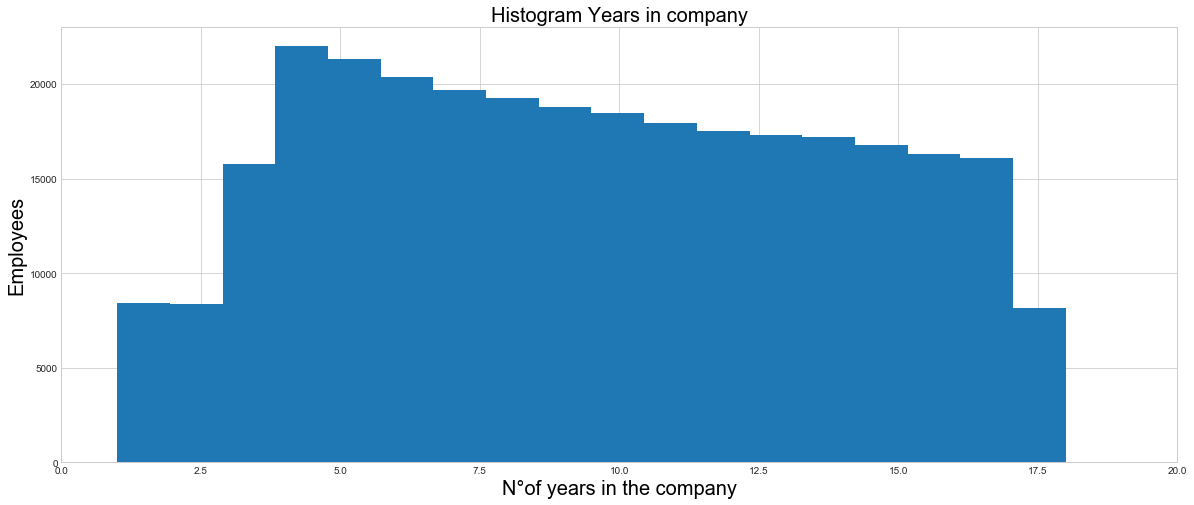

In [114]:
%matplotlib inline
rcParams['figure.figsize'] = 20, 8

plt.ylabel('Employees',fontsize=20, color='black')
plt.xlabel('N°of years in the company',fontsize=20, color='black')
plt.title("Histogram Years in company",fontsize=20, color='black')
axes = plt.gca()
axes.set_xlim([0,20])
axes.set_ylim([0,23000])
plt.hist(years_in_company_3['years_in_company'], bins=18)
plt.show()

In [115]:
#Adding column to calculate yearly salary increment
# First value of yearly_salary_increment= (62102-60117)/60117 = 0.0330189
salaries['yearly_salary_increment'] =  pd.DataFrame(salaries['salary']).pct_change(1)
salaries.head(5)

,emp_no,salary,from_date,to_date,yearly_salary_increment
0,10001,60117,1986-06-26,1987-06-26,NaN
1,10001,62102,1987-06-26,1988-06-25,0.033019
2,10001,66074,1988-06-25,1989-06-25,0.063959
3,10001,66596,1989-06-25,1990-06-25,0.007900
4,10001,66961,1990-06-25,1991-06-25,0.005481


In [116]:
# Obtaining average salary 
average_yearly_salary_increment = salaries.groupby('emp_no', as_index=True)['yearly_salary_increment'].mean()
average_yearly_salary_increment.head(5)

emp_no
10001    0.025025
10002   -0.026954
10003   -0.052158
10004    0.034666
10005    0.019270
Name: yearly_salary_increment, dtype: float64

In [117]:
average_yearly_salary_increment_1= pd.DataFrame(average_yearly_salary_increment, columns =['yearly_salary_increment'])
average_yearly_salary_increment_1['percentage'] = average_yearly_salary_increment_1['yearly_salary_increment']*100
average_yearly_salary_increment_1.describe()

,yearly_salary_increment,percentage
count,300024.000000,300024.000000
mean,-0.003496,-0.349609
std,0.079204,7.920365
min,-0.692239,-69.223946
25%,-0.016828,-1.682837
50%,0.006380,0.637995
75%,0.024881,2.488088
max,1.407570,140.757023


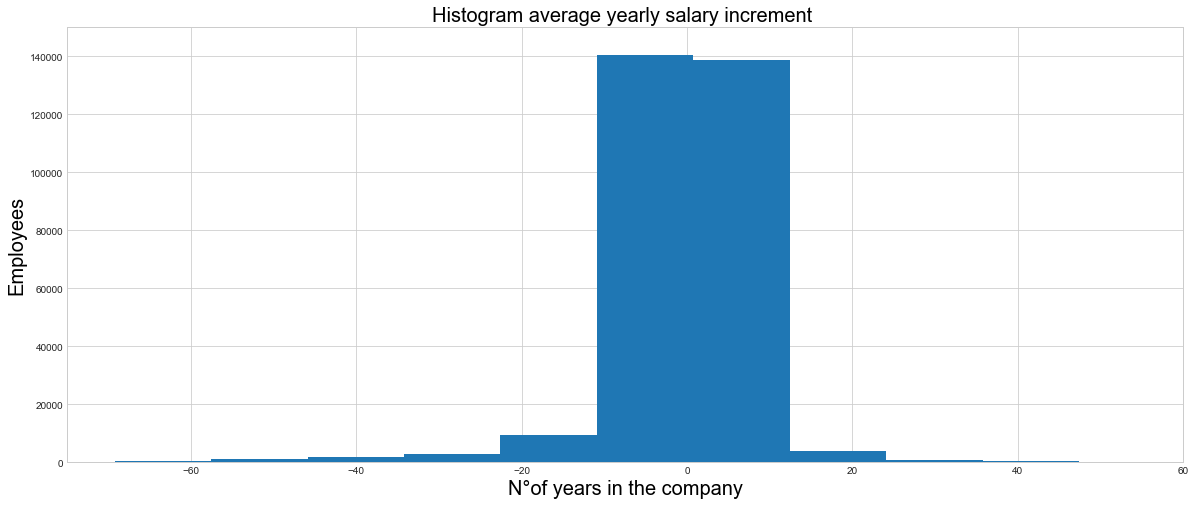

In [118]:
%matplotlib inline
rcParams['figure.figsize'] = 20, 8

plt.ylabel('Employees',fontsize=20, color='black')
plt.xlabel('N°of years in the company',fontsize=20, color='black')
plt.title("Histogram average yearly salary increment ",fontsize=20, color='black')
axes = plt.gca()
axes.set_xlim([-75,60])
axes.set_ylim([0,150000])
plt.hist(average_yearly_salary_increment_1['percentage'], bins=18)
plt.show()

In [119]:
salaries_1 = pd.concat([years_in_company_3], axis=1)
salaries_1.head(5)

,years_in_company
emp_no,
223199,1
449362,1
105923,1
286775,1
105916,1


Salaries table contains ~2,669,372 records for every of the 300024 employees, in average employees have worked 9.5 years, nevertheless,the average of yearly salary increment results confusing because of some cases where employees salaries have reduction instead of expected growth. The salaries table required replacement of date values in the last salary record per employee "9999-01-01" in column 'to_date', max date found in dataset 2002-08-01 plus one year was placed instead.